<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_49_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Importing the datatset

Link: https://drive.google.com/file/d/1Uxgckpb1G1xI2G4INY02OVU0FOwRgknw/view?usp=sharing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/salary_range.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA - DE, DM, DC, DV

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
cols = ['age', 'workclass', 'id', 'education', 'education_num', 'martial_staus', 'occupation', 'relationship',
        'race', 'gender', 'captial_gain', 'capital_loss','hours_per_week', 'native_country', 'income']

In [6]:
df.columns = cols

In [7]:
df.head()

,age,workclass,id,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.tail()

,age,workclass,id,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   id              32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   martial_staus   32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  captial_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,id,education_num,captial_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isna().sum()

age               0
workclass         0
id                0
education         0
education_num     0
martial_staus     0
occupation        0
relationship      0
race              0
gender            0
captial_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
df.isna().sum().sum()

0

In [13]:
df.head(2)

,age,workclass,id,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [14]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
df[df.workclass==' ?'].education

26        Some-college
60             7th-8th
68        Some-college
76                10th
105               10th
             ...      
32529        Bachelors
32530        Bachelors
32538        Doctorate
32540          HS-grad
32541          HS-grad
Name: education, Length: 1836, dtype: object

In [16]:
df.loc[df.workclass==' ?',['education']].value_counts()

education    
 HS-grad         532
 Some-college    514
 Bachelors       173
 11th            118
 10th            100
 7th-8th          72
 Assoc-voc        61
 9th              51
 Masters          48
 Assoc-acdm       47
 12th             40
 5th-6th          30
 Prof-school      18
 Doctorate        15
 1st-4th          12
 Preschool         5
dtype: int64

In [17]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [18]:
df.loc[df.education==' HS-grad',['workclass']].value_counts()

workclass        
 Private             7780
 Self-emp-not-inc     866
 ?                    532
 Local-gov            503
 Self-emp-inc         279
 State-gov            268
 Federal-gov          263
 Without-pay            9
 Never-worked           1
dtype: int64

In [19]:
df.loc[df.education==' Some-college',['workclass']].value_counts()

workclass        
 Private             5094
 ?                    514
 Self-emp-not-inc     486
 Local-gov            387
 State-gov            325
 Federal-gov          254
 Self-emp-inc         226
 Without-pay            3
 Never-worked           2
dtype: int64

In [20]:
df.loc[df.education==' Bachelors',['workclass']].value_counts()

workclass        
 Private             3551
 Local-gov            477
 Self-emp-not-inc     399
 Self-emp-inc         273
 State-gov            269
 Federal-gov          212
 ?                    173
dtype: int64

In [22]:
"""
' HS-grad' -> Private
' Some-college' -> Private
' Bachelors' -> Private
"""

"\n' HS-grad' -> Private\n' Some-college' -> Private\n' Bachelors' -> Private\n"

In [23]:
for i in range(len(df.workclass)):
  df.workclass[i] = re.sub('^\s', '', df.workclass[i])

<ipython-input-23-f35c79c61146>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.workclass[i] = re.sub('^\s', '', df.workclass[i])


In [24]:
df.workclass[0]

'Self-emp-not-inc'

In [25]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [26]:
# Change "?" -> Private in the workclass column
df.workclass.replace('?', "Private", inplace=True)

In [27]:
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [28]:
encoder = LabelEncoder()

In [29]:
df.workclass = encoder.fit_transform(df.workclass)

In [30]:
df.workclass.value_counts()

3    24532
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

In [31]:
df.head(1)

,age,workclass,id,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [32]:
df.drop('id', axis=1, inplace=True)

In [33]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [34]:
df.education.nunique()

16

In [35]:
lis = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th'] # -> Schooling

In [36]:
df.education.replace(lis, ['Schooling' for i in range(len(lis))], inplace=True)

In [37]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
Schooling         4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

In [38]:
for i in range(len(df.education)):
  df.education[i] = re.sub('^\s', '', df.education[i])

<ipython-input-38-011baeedd893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[i] = re.sub('^\s', '', df.education[i])


In [39]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Schooling        4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [40]:
df.education = encoder.fit_transform(df.education)

In [41]:
df.education.value_counts()

4    10501
8     7291
2     5354
7     4253
5     1723
1     1382
0     1067
6      576
3      413
Name: education, dtype: int64

In [42]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,4,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [43]:
df.martial_staus.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_staus, dtype: int64

In [44]:
for i in range(len(df.martial_staus)):
  df.martial_staus[i] = re.sub('^\s', '', df.martial_staus[i])

<ipython-input-44-5de0f2a34e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.martial_staus[i] = re.sub('^\s', '', df.martial_staus[i])


In [45]:
df.martial_staus.replace('Separated', 'Divorced', inplace=True)

In [46]:
df.martial_staus.value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  5468
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: martial_staus, dtype: int64

In [47]:
df.martial_staus = encoder.fit_transform(df.martial_staus)

In [48]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,4,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [49]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [50]:
for i in range(len(df.occupation)):
  df.occupation[i] = re.sub('^\s', '', df.occupation[i])

<ipython-input-50-dce3fcafe21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.occupation[i] = re.sub('^\s', '', df.occupation[i])


In [51]:
df.occupation.replace('?', "Other-service", inplace=True)

In [52]:
df.occupation = encoder.fit_transform(df.occupation)

In [53]:
df.occupation.value_counts()

7     5138
9     4140
2     4099
3     4066
0     3769
11    3650
6     2002
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: occupation, dtype: int64

In [54]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,Husband,White,Male,0,0,13,United-States,<=50K
1,38,3,4,9,0,5,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [55]:
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [56]:
for i in range(len(df.relationship)):
  df.relationship[i] = re.sub('^\s', '', df.relationship[i])

<ipython-input-56-41365c0bca73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relationship[i] = re.sub('^\s', '', df.relationship[i])


In [57]:
df.relationship.replace(['Husband', 'Wife'], ['Spouse', 'Spouse'], inplace=True)

In [58]:
df.relationship = encoder.fit_transform(df.relationship)

In [59]:
df.relationship.value_counts()

3    14761
0     8304
2     5068
4     3446
1      981
Name: relationship, dtype: int64

In [60]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,3,White,Male,0,0,13,United-States,<=50K
1,38,3,4,9,0,5,0,White,Male,0,0,40,United-States,<=50K


In [61]:
df.race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [62]:
for i in range(len(df.race)):
  df.race[i] = re.sub('^\s', '', df.race[i])

<ipython-input-62-4a3975a03cb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[i] = re.sub('^\s', '', df.race[i])


In [63]:
df.race = encoder.fit_transform(df.race)

In [64]:
df.race.value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

In [65]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,3,4,Male,0,0,13,United-States,<=50K
1,38,3,4,9,0,5,0,4,Male,0,0,40,United-States,<=50K


In [66]:
df.gender.value_counts()

 Male      21789
 Female    10771
Name: gender, dtype: int64

In [67]:
for i in range(len(df.gender)):
  df.gender[i] = re.sub('^\s', '', df.gender[i])

<ipython-input-67-6a60ecb27106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[i] = re.sub('^\s', '', df.gender[i])


In [68]:
df.gender = encoder.fit_transform(df.gender)

In [69]:
df.gender.value_counts()

1    21789
0    10771
Name: gender, dtype: int64

In [70]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,3,4,1,0,0,13,United-States,<=50K
1,38,3,4,9,0,5,0,4,1,0,0,40,United-States,<=50K


In [71]:
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
for i in range(len(df.native_country)):
  df.native_country[i] = re.sub('^\s', '', df.native_country[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
df.native_country.replace('?', 'Others', inplace=True)

In [73]:
df.native_country = encoder.fit_transform(df.native_country)

In [74]:
df.head(2)

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,3,4,1,0,0,13,39,<=50K
1,38,3,4,9,0,5,0,4,1,0,0,40,39,<=50K


In [75]:
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [76]:
for i in range(len(df.income)):
  df.income[i] = re.sub('^\s', '', df.income[i])

<ipython-input-76-955a883a5ff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income[i] = re.sub('^\s', '', df.income[i])


In [77]:
df.income = encoder.fit_transform(df.income)

In [78]:
df.head()

,age,workclass,education,education_num,martial_staus,occupation,relationship,race,gender,captial_gain,capital_loss,hours_per_week,native_country,income
0,50,5,2,13,2,3,3,4,1,0,0,13,39,0
1,38,3,4,9,0,5,0,4,1,0,0,40,39,0
2,53,3,7,7,2,5,3,2,1,0,0,40,39,0
3,28,3,2,13,2,9,3,2,0,0,0,40,5,0
4,37,3,5,14,2,3,3,4,0,0,0,40,39,0


In [79]:
model = ExtraTreesClassifier()

In [80]:
X = df.drop('income', axis=1)
y = df.income

In [81]:
model.fit(X,y)

ExtraTreesClassifier()

In [82]:
model.feature_importances_

array([0.21703997, 0.04817359, 0.04264466, 0.09279079, 0.08318267,
       0.09297883, 0.09483876, 0.01713871, 0.03242137, 0.10021993,
       0.03261876, 0.12457074, 0.02138122])

In [83]:
imortant_features = pd.Series(model.feature_importances_, index=X.columns)

In [84]:
imortant_features

age               0.217040
workclass         0.048174
education         0.042645
education_num     0.092791
martial_staus     0.083183
occupation        0.092979
relationship      0.094839
race              0.017139
gender            0.032421
captial_gain      0.100220
capital_loss      0.032619
hours_per_week    0.124571
native_country    0.021381
dtype: float64

<Axes: >

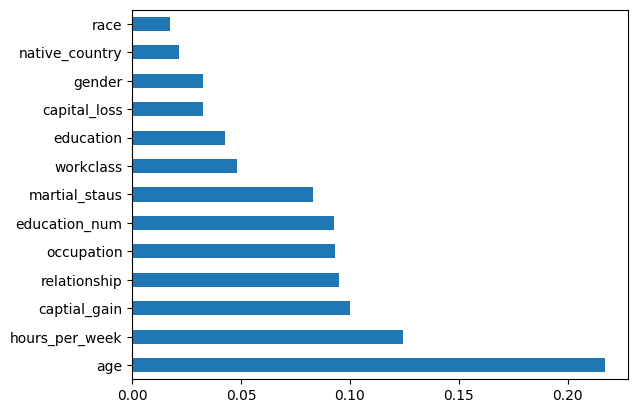

In [85]:
imortant_features.nlargest(13).plot(kind='barh')

In [86]:
skf = StratifiedKFold(n_splits=5)

In [87]:
for train_index,test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [88]:
len(X_train)

26048

In [89]:
len(X_test)

6512

In [90]:
nb_model = GaussianNB()
dc_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()

In [91]:
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

In [92]:
dc_model.fit(X_train, y_train)
dc_y_pred = dc_model.predict(X_test)

In [93]:
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [94]:
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

In [95]:
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

In [96]:
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
final = pd.DataFrame({"Actual": y_test,
                      "NBC": nb_y_pred,
                      "DTC": dc_y_pred,
                      "RFC": rf_y_pred,
                      "SVC": svc_y_pred,
                      "KNN": knn_y_pred,
                      "LRC": lr_y_pred,})

In [98]:
final

,Actual,NBC,DTC,RFC,SVC,KNN,LRC
26005,0,0,0,0,0,0,0
26006,0,0,0,0,0,1,1
26007,0,0,0,0,0,0,0
26008,0,0,0,0,0,0,0
26011,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0
32556,1,0,0,0,0,0,0
32557,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0


In [99]:
print(f'Naive Bayes: {accuracy_score(y_test, nb_y_pred)}')
print(f'Decision Tree: {accuracy_score(y_test, dc_y_pred)}')
print(f'Random Forest: {accuracy_score(y_test, rf_y_pred)}')
print(f'SVC: {accuracy_score(y_test, svc_y_pred)}')
print(f'KNN: {accuracy_score(y_test, knn_y_pred)}')
print(f'Logistic Regression: {accuracy_score(y_test, lr_y_pred)}')

Naive Bayes: 0.8100429975429976
Decision Tree: 0.8194103194103194
Random Forest: 0.8565724815724816
SVC: 0.804514742014742
KNN: 0.8402948402948403
Logistic Regression: 0.7985257985257985


In [101]:
"""
NB -> 81%
DT -> 82%
RF -> 85%
SVC -> 80%
KNN -> 84%
LR -> 80%
"""

'\nNB -> 81%\nDT -> 82%\nRF -> 85%\nSVC -> 80%\nKNN -> 84%\nLR -> 80%\n'